In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%run ../load_data.py
%run ../dir_utils.py

Using TensorFlow backend.


# Test generator function

In [3]:
batch_size=128
#filepath='/home/zhampel/insight/data/mnist/pngs'
trainpath='/home/zhampel/insight/data/cifar-10-images'
data_dir_struct = DataDirStruct(trainpath)
train_gen, valid_gen = train_img_generator(dir_struct=data_dir_struct, \
                                           batch_size=batch_size, \
                                           val_split=0.2)

Classes: 10, Image Dims: (32, 32)
Found 40000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [4]:
test_gen = test_img_generator(dir_struct=data_dir_struct, \
                              batch_size=batch_size)
print(test_gen.image_shape)
print(test_gen.num_classes)
print(test_gen.batch_size)

Classes: 10, Image Dims: (32, 32)
Found 10000 images belonging to 10 classes.
(32, 32, 3)
10
128


In [5]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

np.random.seed(1671)
np.set_printoptions(threshold='nan')

In [6]:
import keras
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential

In [7]:
class History(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []
        self.val_acc = []
        self.loss = []
        self.val_loss = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))
        self.loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))

In [8]:
# Grab input shape and class numbers from generator
# Specifics
batch_size = test_gen.batch_size
epochs = 100
input_shape = train_gen.image_shape
num_classes = train_gen.num_classes
# History
history = History()
# Model
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [9]:
# Run the training
model.fit_generator(train_gen,
                    steps_per_epoch=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=valid_gen,
                    validation_steps=10,
                    class_weight=None,
                    callbacks=[history])

Epoch 1/100
128/128 [==============================] - 4s 33ms/step - loss: 1.7570 - acc: 0.3648 - val_loss: 1.5834 - val_acc: 0.4430
Epoch 2/100
128/128 [==============================] - 3s 24ms/step - loss: 1.4399 - acc: 0.4752 - val_loss: 1.4265 - val_acc: 0.4930
Epoch 3/100
128/128 [==============================] - 3s 25ms/step - loss: 1.2950 - acc: 0.5377 - val_loss: 1.2214 - val_acc: 0.5672
Epoch 4/100
128/128 [==============================] - 3s 25ms/step - loss: 1.2189 - acc: 0.5674 - val_loss: 1.1633 - val_acc: 0.5875
Epoch 5/100
128/128 [==============================] - 3s 25ms/step - loss: 1.1339 - acc: 0.5975 - val_loss: 1.1742 - val_acc: 0.5828
Epoch 6/100
128/128 [==============================] - 3s 25ms/step - loss: 1.0748 - acc: 0.6218 - val_loss: 1.1317 - val_acc: 0.6086
Epoch 7/100
128/128 [==============================] - 3s 25ms/step - loss: 1.0201 - acc: 0.6456 - val_loss: 1.0762 - val_acc: 0.6250
Epoch 8/100
128/128 [==============================] - 3s 25ms

Epoch 62/100
128/128 [==============================] - 3s 26ms/step - loss: 0.0352 - acc: 0.9886 - val_loss: 2.2581 - val_acc: 0.6687
Epoch 63/100
128/128 [==============================] - 3s 25ms/step - loss: 0.0418 - acc: 0.9864 - val_loss: 2.3310 - val_acc: 0.6664
Epoch 64/100
128/128 [==============================] - 3s 26ms/step - loss: 0.0685 - acc: 0.9765 - val_loss: 2.1764 - val_acc: 0.6766
Epoch 65/100
128/128 [==============================] - 3s 25ms/step - loss: 0.0378 - acc: 0.9881 - val_loss: 2.2303 - val_acc: 0.6758
Epoch 66/100
128/128 [==============================] - 3s 24ms/step - loss: 0.0449 - acc: 0.9854 - val_loss: 2.2718 - val_acc: 0.6602
Epoch 67/100
128/128 [==============================] - 3s 26ms/step - loss: 0.0508 - acc: 0.9822 - val_loss: 2.2410 - val_acc: 0.6758
Epoch 68/100
128/128 [==============================] - 3s 25ms/step - loss: 0.0504 - acc: 0.9839 - val_loss: 2.2816 - val_acc: 0.6750
Epoch 69/100
128/128 [==============================] -

In [10]:
# Evaluate score
score = model.evaluate_generator(test_gen, steps=20, max_queue_size=256)
print("Test score: {}".format(score[0]))
print("Test accuracy: {}".format(score[1]))

Test score: 2.7376998007297515
Test accuracy: 0.659765625


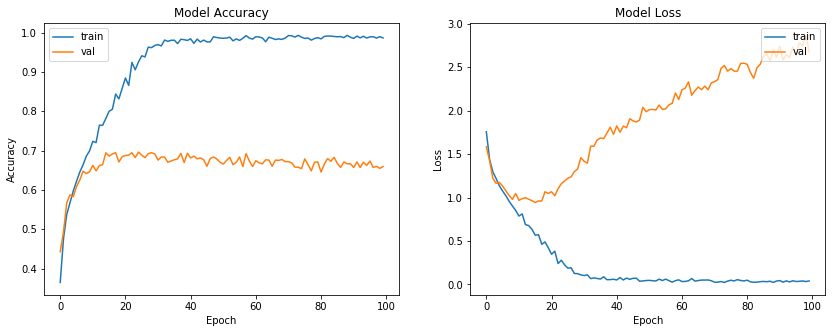

In [11]:
# Summarize history
f = plt.figure(figsize=(14,5))

# Summarize accuracy history
plt.subplot(1,2,1)
plt.plot(history.acc)
plt.plot(history.val_acc)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
# Summarize loss history
plt.plot(history.loss)
plt.plot(history.val_loss)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
#plt.show()